In [1]:
%matplotlib inline 
from ase.build import fcc111, add_adsorbate # ASE's utilities to build the surface
from clusterx.parent_lattice import ParentLattice 
from clusterx.structures_set import StructuresSet
from clusterx.visualization import juview
from clusterx.super_cell import SuperCell
from random import randint
import numpy as np
np.random.seed(10)
from ase.build import surface
from ase import Atoms

scell_x, scell_y = 3, 3
layer_height = 7

a = 2.874
c = 3.661

Alloy= Atoms('AuCu', scaled_positions=[(0, 0, 0),
                                (0.5, 0.5, 0.5),
                                ],
              cell=[a, a, c],
              pbc=True)
juview(Alloy)
pri = surface(Alloy, (1, 1, 0), layer_height)


pri.center(vacuum=20.0, axis=2)
juview(pri)

NGLWidget()

In [2]:
symbols = pri.get_chemical_symbols() # Get Chemical symbols of slab
z_coords = pri.get_positions()[:,2] # Get z-coordinate of atomic positions in slab

print("{0:<19s}|{1:<19s}|{2:<19s}".format("Atom index","Chemical symbol","z coordinate")) # Print headers
for i, (symbol, z_coord) in enumerate(zip(symbols,z_coords)):
    print("{0:<19d}|{1:<19s}|{2:<19.3f}".format(i,symbol,z_coord)) # Print atom indexes, symbols and z_coordinat

Atom index         |Chemical symbol    |z coordinate       
0                  |Au                 |20.000             
1                  |Cu                 |20.000             
2                  |Au                 |22.032             
3                  |Cu                 |22.032             
4                  |Au                 |24.064             
5                  |Cu                 |24.064             
6                  |Au                 |26.097             
7                  |Cu                 |26.097             
8                  |Au                 |28.129             
9                  |Cu                 |28.129             
10                 |Au                 |30.161             
11                 |Cu                 |30.161             
12                 |Au                 |32.193             
13                 |Cu                 |32.193             


In [3]:
list_of_elements = [["Au", "Cu"]] * len(pri)
#list_of_elements = [["Pd", "Zn"]] * (len(pri)-1) + [["Pd", "Zn", "X", "O"]] # if we would like to put a layer of vacancy or occygen
print(list_of_elements)
platt = ParentLattice(pri, symbols= list_of_elements)
juview(platt)

[['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Cu']]


In [4]:
platt.get_sublattice_types(pretty_print=True)


+--------------------------------------------------------------------+
|              The structure consists of 1 sublattices               |
+--------------------------------------------------------------------+
| Sublattice type |       Chemical symbols       |  Atomic numbers   |
+--------------------------------------------------------------------+
|        0        |         ['Au' 'Cu']          |      [79 29]      |
+--------------------------------------------------------------------+



In [5]:
scell = SuperCell(platt,[scell_x, scell_y])
#juview(scell)

scell.get_sublattice_types(pretty_print=True)

    
sset = StructuresSet(platt)
z_coords_2 = scell.get_positions()[:]

nstruc = 60 # we are generating 60 ramdom structures
for i in range(nstruc):
    concentration = {0:[randint(1,len(scell))]} # Pick a random concentration of "Zn" substitutions starting from 1 to 4*4*3
    
    sset.add_structure(scell.gen_random(concentration)) # Generate and add a random structure to the StructuresSet

print("\nRandom structures (first 3) of nstru:")
sset.serialize("sset.json") # Write JSON db file for visualization with ASE's GUI.
#juview(sset,n=3) # Plot the first 3 created random structrues



+--------------------------------------------------------------------+
|              The structure consists of 1 sublattices               |
+--------------------------------------------------------------------+
| Sublattice type |       Chemical symbols       |  Atomic numbers   |
+--------------------------------------------------------------------+
|        0        |         ['Au' 'Cu']          |      [79 29]      |
+--------------------------------------------------------------------+


Random structures (first 3) of nstru:


In [6]:
from clusterx.calculators.emt import EMT2 # Load the EMT calculator from ASE
from clusterx.visualization import plot_property_vs_concentration

sset.set_calculator(EMT2())
sset.calculate_property("total_energy_emt") # Calculate energies with Effective Medium Theory calculator of ASE, the output below is the enrgies of the 60 structures


[17.95560400815038,
 23.624838263106838,
 20.360608137493607,
 15.806809493431393,
 17.59403526641212,
 36.91623749258479,
 16.727458489998433,
 33.97108985679073,
 23.845792218439975,
 24.078823254560035,
 30.17254311328651,
 38.25572407036394,
 20.58096741106214,
 19.082523998217198,
 21.435645268308406,
 16.360258939046403,
 17.641629423921593,
 15.734004640341738,
 18.928334191795862,
 17.96148227463648,
 23.3550528387961,
 15.389503318578878,
 25.36357268132337,
 16.60198893829984,
 22.62840128794759,
 29.356998343795148,
 17.176042592022945,
 16.226953198580972,
 22.059266643184607,
 17.74815244789953,
 15.48253927643358,
 15.842359568789963,
 16.254830727670573,
 15.586894750746605,
 17.19835747897759,
 18.750162877375335,
 18.55392831525159,
 16.253049192590264,
 50.60467673325278,
 16.390369051440558,
 18.630938597522615,
 20.21604839662227,
 15.51833725389221,
 35.80783002243571,
 29.358583597611922,
 19.944251376687568,
 47.36228360819637,
 30.14708844333388,
 16.00537140457

In [7]:
#In the next cell, we will create a small structures set containing just two structures: one pristine, non-substituted (all Pd) and free of adsorbants, and the other a fully substituted one (Pd->Zn), still without O adsorbants. NO CO2 HERE. The energies 𝐸0 and 𝐸1 of these structures will serve as references for generating figures depicting the total energy versus concentration: 𝑒=𝐸−𝐸0∗(1−𝑥)+𝐸1∗𝑥, with 𝐸 the EMT energy of the structure and 𝑥 the Zn concentration.

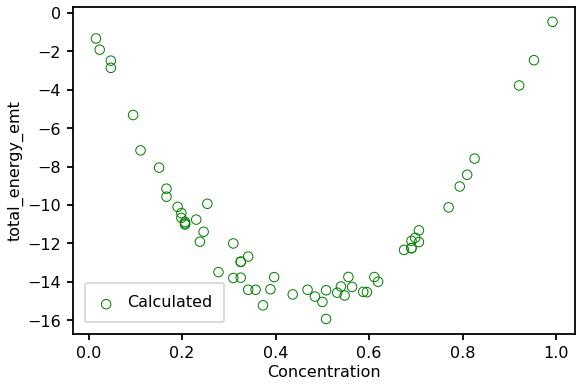

{'concentration': [0.3412698412698413,
  0.5555555555555556,
  0.48412698412698413,
  0.19047619047619047,
  0.09523809523809523,
  0.8095238095238095,
  0.35714285714285715,
  0.7698412698412699,
  0.5873015873015873,
  0.5952380952380952,
  0.7063492063492064,
  0.8253968253968254,
  0.5,
  0.015873015873015872,
  0.5079365079365079,
  0.3253968253968254,
  0.30952380952380953,
  0.1984126984126984,
  0.047619047619047616,
  0.25396825396825395,
  0.5634920634920635,
  0.20634920634920634,
  0.6111111111111112,
  0.15079365079365079,
  0.5396825396825397,
  0.6904761904761905,
  0.3253968253968254,
  0.3412698412698413,
  0.5317460317460317,
  0.3888888888888889,
  0.1984126984126984,
  0.30952380952380953,
  0.24603174603174602,
  0.16666666666666666,
  0.3253968253968254,
  0.023809523809523808,
  0.047619047619047616,
  0.1111111111111111,
  0.9920634920634921,
  0.23015873015873015,
  0.3968253968253968,
  0.46825396825396826,
  0.20634920634920634,
  0.7936507936507936,
  0.6904

In [8]:
refs = StructuresSet(platt)
refs.add_structure(scell.gen_random({0:[0]})) # Pristine
refs.add_structure(scell.gen_random({0:[0],0:[len(scell)]})) # Full Zn substitution 3*4*4

refs.set_calculator(EMT2())
refs.calculate_property("total_energy_emt_refs")
ref_en = refs.get_property_values("total_energy_emt_refs")
from ase.io import write

plot_property_vs_concentration(sset, site_type=0, property_name="total_energy_emt",refs=ref_en,scale=0.6)


In [17]:
#The next step is to create a pool of cluters:
#r=16
from clusterx.clusters.clusters_pool import ClustersPool
cpool = ClustersPool(platt, npoints=[0,1,2], radii=[0, -1,-1], super_cell=scell) #here we are asking for pool of clusters with a substitution npoints with specific radii, more we add points and increase the sistances more it will be accurate however it will take more times to generate
print(len(cpool)," clusters were generated.")

129  clusters were generated.


In [10]:
cpool.serialize(db_name="cpool.json")
#juview(cpool.get_cpool_atoms(),n=6)

In [11]:
#building the CE model using linear regression method (other methods are available too)
from clusterx.model import ModelBuilder

mb = ModelBuilder(selector_type="linreg",selector_opts={'clusters_sets':'size'},estimator_type="skl_LinearRegression",estimator_opts={"fit_intercept":False})
cemodel1 = mb.build(sset, cpool, "total_energy_emt") #Build CE model using the training data set
cpool_opt1 = mb.get_opt_cpool()

cemodel1.report_errors(sset)
cpool_opt1.display_info(ecis=cemodel1.get_ecis())
cpool_opt1.write_clusters_db(db_name="cpool_opt.json")


+-----------------------------------------------------------+
|                Report of Fit and CV scores                |
+-----------------------------------------------------------+
|                   |        Fit        |        CV         |
+-----------------------------------------------------------+
|       RMSE        |      0.14449      |      0.32338      |
|        MAE        |      0.10381      |      0.24801      |
|       MaxAE       |      0.41569      |      0.78203      |
+-----------------------------------------------------------+


+-------------------------------------------------------------------------------+
|                             Clusters Pool Info                                |
+-------------------------------------------------------------------------------+
|       Index       |   Nr. of points   |      Radius       |        ECI        |
+-------------------------------------------------------------------------------+
|         0         |        

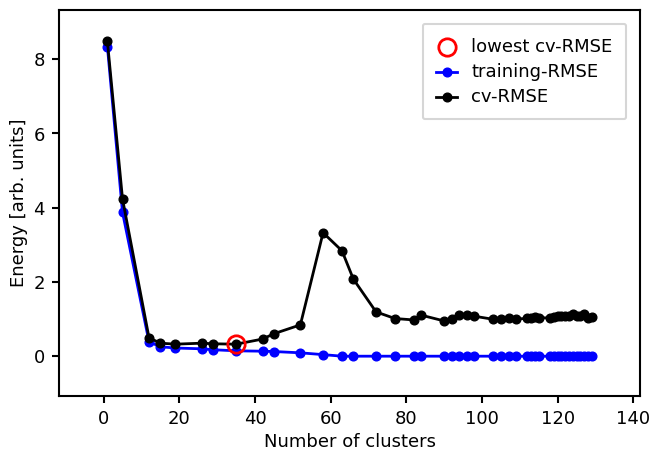

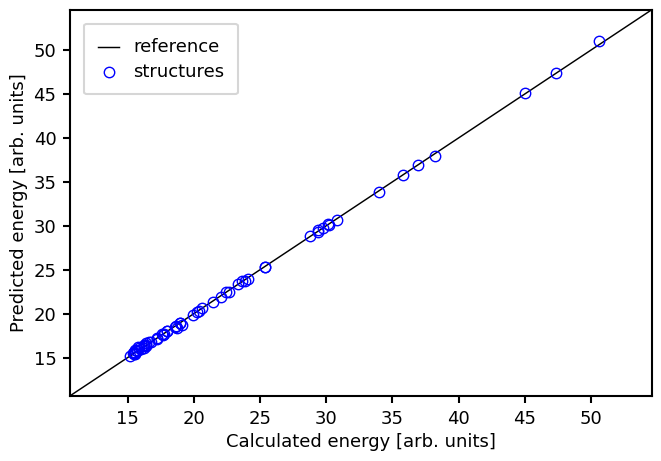

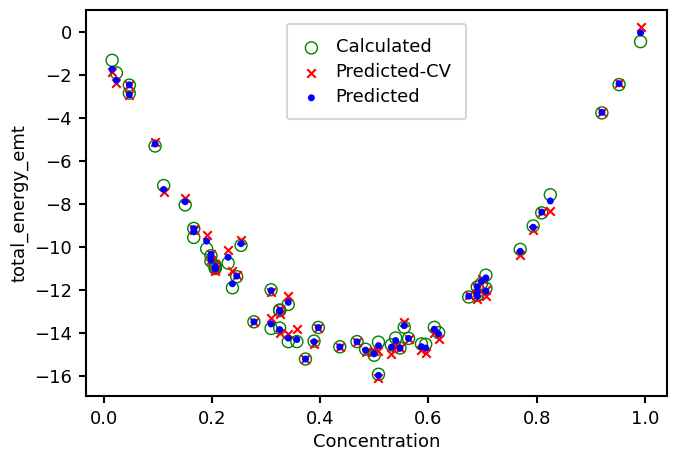

{'concentration': [0.3412698412698413,
  0.5555555555555556,
  0.48412698412698413,
  0.19047619047619047,
  0.09523809523809523,
  0.8095238095238095,
  0.35714285714285715,
  0.7698412698412699,
  0.5873015873015873,
  0.5952380952380952,
  0.7063492063492064,
  0.8253968253968254,
  0.5,
  0.015873015873015872,
  0.5079365079365079,
  0.3253968253968254,
  0.30952380952380953,
  0.1984126984126984,
  0.047619047619047616,
  0.25396825396825395,
  0.5634920634920635,
  0.20634920634920634,
  0.6111111111111112,
  0.15079365079365079,
  0.5396825396825397,
  0.6904761904761905,
  0.3253968253968254,
  0.3412698412698413,
  0.5317460317460317,
  0.3888888888888889,
  0.1984126984126984,
  0.30952380952380953,
  0.24603174603174602,
  0.16666666666666666,
  0.3253968253968254,
  0.023809523809523808,
  0.047619047619047616,
  0.1111111111111111,
  0.9920634920634921,
  0.23015873015873015,
  0.3968253968253968,
  0.46825396825396826,
  0.20634920634920634,
  0.7936507936507936,
  0.6904

In [12]:
from clusterx.visualization import plot_optimization_vs_number_of_clusters
from clusterx.visualization import plot_predictions_vs_target
plot_optimization_vs_number_of_clusters(mb.get_selector(),scale=0.5)
plot_predictions_vs_target(sset,cemodel1,"total_energy_emt",scale=0.5)
plot_property_vs_concentration(sset, site_type=0, property_name="total_energy_emt",cemodel=cemodel1,refs=ref_en,scale=0.5)

In [13]:
# strating the MC
scell.get_sublattice_types(pretty_print=True)
sites_dict = scell.get_nsites_per_type()
for key in sites_dict.keys():
    print("Number of atoms in sublattice "+str(key)+":", sites_dict[key])

from clusterx.visualization import juview
juview(scell)


+--------------------------------------------------------------------+
|              The structure consists of 1 sublattices               |
+--------------------------------------------------------------------+
| Sublattice type |       Chemical symbols       |  Atomic numbers   |
+--------------------------------------------------------------------+
|        0        |         ['Au' 'Cu']          |      [79 29]      |
+--------------------------------------------------------------------+

Number of atoms in sublattice 0: 126


In [14]:
nsites = len(scell.get_substitutional_atoms())
print(nsites)

126


In [15]:
from clusterx.thermodynamics.monte_carlo import MonteCarlo
from clusterx.model import Model
from ase.io.trajectory import Trajectory
from ase.io import write, read
kb = float(8.6173303*10**(-5)) # Boltzmann constant in eV/K
temp = 300 # Temperature in K

for i in range (1, len(scell)):
     nsubs = {0:[i]}

# Initialization of a MonteCarlo object

     mc = MonteCarlo(cemodel1, scell, ensemble = "canonical", nsubs=nsubs, predict_swap = True, filename = 'MC'+str(nsubs)+'.json')

# Execution of a Metropolis Monte-Carlo sampling
     traj = mc.metropolis(no_of_sampling_steps = 50, temperature = 300, boltzmann_constant = kb,  scale_factor = [1/(1.0*nsites)])
# do we need to run DFT on MC structures?
     lowest_energy = traj.get_lowest_energy_structure()  #write the energy # write to db 
   #lowest_energy = trajectory.get_lowest_non_degenerate_structure() #get lowest energy non duplicated
     sset.add_structure(lowest_energy, write_to_db=True)      #adding the structures to the sset? 
sset.serialize("sset_mc.json")

In [19]:
# The new MC structures will need to be calculated using DFT
sset.set_calculator(EMT2())
sset.calculate_property("total_energy_emt")

[17.95560400815038,
 23.624838263106838,
 20.360608137493607,
 15.806809493431393,
 17.59403526641212,
 36.91623749258479,
 16.727458489998433,
 33.97108985679073,
 23.845792218439975,
 24.078823254560035,
 30.17254311328651,
 38.25572407036394,
 20.58096741106214,
 19.082523998217198,
 21.435645268308406,
 16.360258939046403,
 17.641629423921593,
 15.734004640341738,
 18.928334191795862,
 17.96148227463648,
 23.3550528387961,
 15.389503318578878,
 25.36357268132337,
 16.60198893829984,
 22.62840128794759,
 29.356998343795148,
 17.176042592022945,
 16.226953198580972,
 22.059266643184607,
 17.74815244789953,
 15.48253927643358,
 15.842359568789963,
 16.254830727670573,
 15.586894750746605,
 17.19835747897759,
 18.750162877375335,
 18.55392831525159,
 16.253049192590264,
 50.60467673325278,
 16.390369051440558,
 18.630938597522615,
 20.21604839662227,
 15.51833725389221,
 35.80783002243571,
 29.358583597611922,
 19.944251376687568,
 47.36228360819637,
 30.14708844333388,
 16.00537140457

In [21]:
# Cluster do not have to be repeated: we are taking here the initial cpool

from clusterx.clusters.clusters_pool import ClustersPool
cpool_from_file = ClustersPool(json_db_filepath="cpool.json")

from clusterx.model import ModelBuilder

mb = ModelBuilder(selector_type="linreg",selector_opts={'clusters_sets':'size'},estimator_type="skl_LinearRegression",estimator_opts={"fit_intercept":False})
cemodel = mb.build(sset, cpool_from_file, "total_energy_emt") #Build CE model using the training data set
#cemodel = mb.build(sset, cpool, "total_energy_emt") #Build CE model using the training data set
cpool_opt_mc = mb.get_opt_cpool()

cemodel.report_errors(sset)
cpool_opt_mc.display_info(ecis=cemodel.get_ecis())
cpool_opt_mc.write_clusters_db(db_name="cpool_opt_mc.json") 


+-----------------------------------------------------------+
|                Report of Fit and CV scores                |
+-----------------------------------------------------------+
|                   |        Fit        |        CV         |
+-----------------------------------------------------------+
|       RMSE        |      0.27916      |      0.31013      |
|        MAE        |      0.22700      |      0.25246      |
|       MaxAE       |      0.65577      |      0.75027      |
+-----------------------------------------------------------+


+-------------------------------------------------------------------------------+
|                             Clusters Pool Info                                |
+-------------------------------------------------------------------------------+
|       Index       |   Nr. of points   |      Radius       |        ECI        |
+-------------------------------------------------------------------------------+
|         0         |        

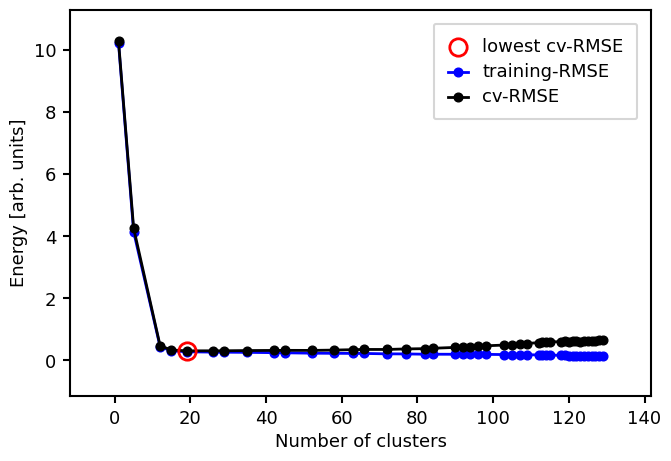

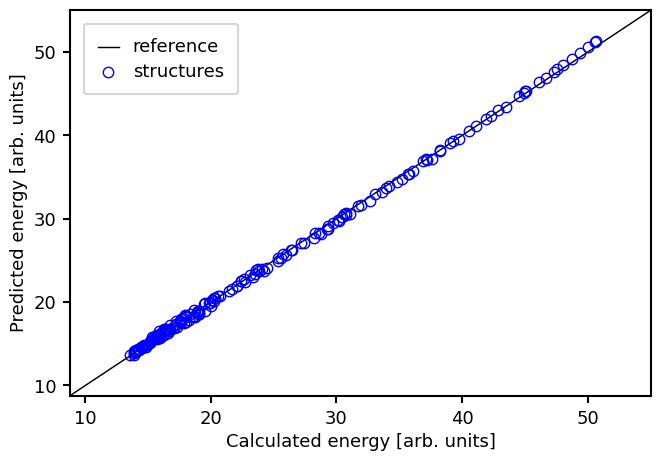

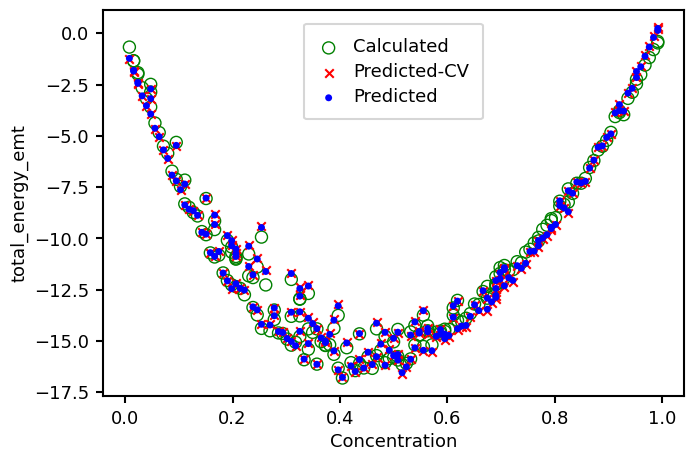

{'concentration': [0.3412698412698413,
  0.5555555555555556,
  0.48412698412698413,
  0.19047619047619047,
  0.09523809523809523,
  0.8095238095238095,
  0.35714285714285715,
  0.7698412698412699,
  0.5873015873015873,
  0.5952380952380952,
  0.7063492063492064,
  0.8253968253968254,
  0.5,
  0.015873015873015872,
  0.5079365079365079,
  0.3253968253968254,
  0.30952380952380953,
  0.1984126984126984,
  0.047619047619047616,
  0.25396825396825395,
  0.5634920634920635,
  0.20634920634920634,
  0.6111111111111112,
  0.15079365079365079,
  0.5396825396825397,
  0.6904761904761905,
  0.3253968253968254,
  0.3412698412698413,
  0.5317460317460317,
  0.3888888888888889,
  0.1984126984126984,
  0.30952380952380953,
  0.24603174603174602,
  0.16666666666666666,
  0.3253968253968254,
  0.023809523809523808,
  0.047619047619047616,
  0.1111111111111111,
  0.9920634920634921,
  0.23015873015873015,
  0.3968253968253968,
  0.46825396825396826,
  0.20634920634920634,
  0.7936507936507936,
  0.6904

In [23]:
from clusterx.visualization import plot_optimization_vs_number_of_clusters
from clusterx.visualization import plot_predictions_vs_target
plot_optimization_vs_number_of_clusters(mb.get_selector(),scale=0.5)
plot_predictions_vs_target(sset,cemodel,"total_energy_emt",scale=0.5)
plot_property_vs_concentration(sset, site_type=0, property_name="total_energy_emt",cemodel=cemodel,refs=ref_en,scale=0.5)

In [24]:
print(len(sset))

185
